In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML
%matplotlib inline

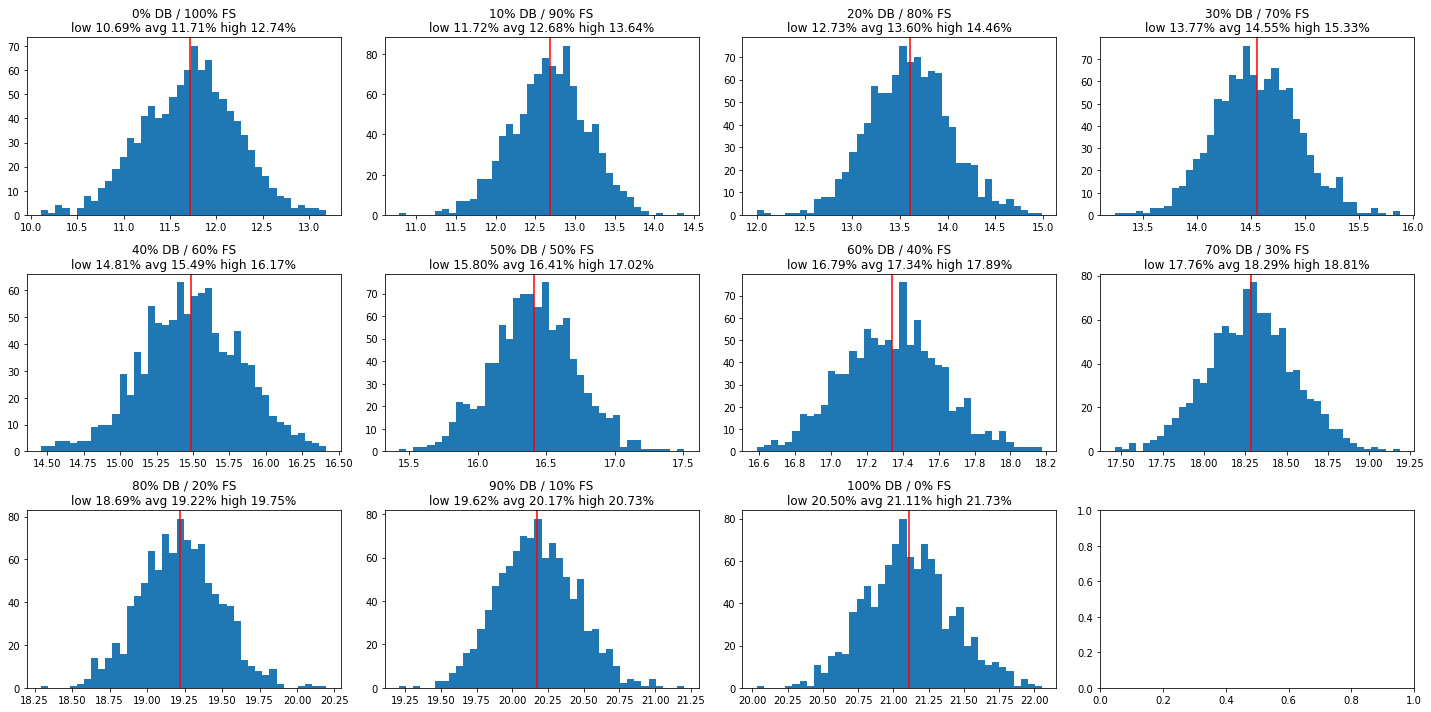

,% DB WORKLOAD,% FS WORKLOAD,% IMPROVEMENT LOW,% IMPROVEMENT AVG,% IMPROVEMENT HIGH
0,0,100,10.69,11.71,12.74
1,10,90,11.72,12.68,13.64
2,20,80,12.73,13.60,14.46
3,30,70,13.77,14.55,15.33
4,40,60,14.81,15.49,16.17
5,50,50,15.80,16.41,17.02
6,60,40,16.79,17.34,17.89
7,70,30,17.76,18.29,18.81
8,80,20,18.69,19.22,19.75
9,90,10,19.62,20.17,20.73


In [6]:
structured_perc_improvement = [18.8, 19.19, 25.32]
unstructured_perc_improvement = [5.65, 5.67, 5.87, 14.32, 15.41, 16.41, 18.79]
percentages = np.arange(0, 110, 10)

results = []
sample_size = 100
simulations = 1000
for i in percentages/100:
    struct_weight = round(i, 1)
    unstruct_weight = round(1 - i,1)
    sample_distribution = []
    for i in range(simulations):
        struct_dedupes = np.mean(np.random.choice(structured_perc_improvement, size=sample_size))
        unstruct_dedupes = np.mean(np.random.choice(unstructured_perc_improvement, size=sample_size))
        weighted_struct_dedupes = struct_dedupes * struct_weight
        weighted_unstruct_dedupes = unstruct_dedupes * unstruct_weight
        perc_improvement_distribution = weighted_unstruct_dedupes + weighted_struct_dedupes
        sample_distribution.append(perc_improvement_distribution)
    results.append(sample_distribution)

max_cols = 4
max_rows = int(np.ceil(len(results) / max_cols))
fig, ax = plt.subplots(max_rows, max_cols, figsize=(20,10))

row = 0
col = 0

table = []

for i in range(len(results)):
    struct_perc = i*10
    unstruct_perc = 100 - struct_perc
    ax[row][col].hist(results[i], bins=40);
    mean = np.mean(results[i])
    std = np.std(results[i])
    low = mean - (2*std)
    high = mean + (2*std)
    ax[row][col].axvline(mean, c='r')
    ax[row][col].set_title(f"{struct_perc}% DB / {unstruct_perc}% FS\nlow {low:0.2f}% avg {mean:0.2f}% high {high:0.2f}%")
    col += 1
    if col != 0 and col % 4 == 0:
        row += 1
        col = 0
    table.append([struct_perc, unstruct_perc, round(low, 2), round(mean, 2), round(high, 2)])
        
plt.tight_layout()
plt.show()

df = pd.DataFrame(table, columns=['% DB WORKLOAD', '% FS WORKLOAD', '% IMPROVEMENT LOW', '% IMPROVEMENT AVG', '% IMPROVEMENT HIGH'])
HTML(df.to_html())